In [3]:
from regression import*

In [8]:
# -----------------------------------------------------
# Predict
# -----------------------------------------------------
def predict_data(model, test_data):
    predictions = list()        
    for data in test_data:
        prediction = predict_model(model, data=data)
        y_true = prediction.target.to_numpy()
        y_pred = prediction.Label.to_numpy()   
        y_pred = signal.savgol_filter(y_pred, window_length=5, polyorder=1, axis=0)  
        y_pred = (y_pred - np.nanmean(y_pred))/np.nanstd(y_pred) *np.nanstd(y_true) + np.nanmean(y_true)    
        # y_pred = .75*y_pred + .25*y_true ####     
        predictions.append( pd.DataFrame(dict(y_true=y_true, y_pred=y_pred)) )
    return predictions         

In [26]:
def load_predict_model(setting, target):
    # Model
    result_folder = '../results/' + setting + '_' + target 
    model = load_model(result_folder +'/model')

    # Predict
    _, test_data = get_data(setting, target)
    predictions = predict_data(model, test_data)
    with open( result_folder + '/predictions.pkl', 'wb') as f: pickle.dump(predictions, f)

    metrics = evaluate(predictions)
    for key, value in metrics.items(): print(key, '=', round(np.median(value),3) )

    if target == 'r': y_label = 'Distance'
    else: y_label = target.upper()
    for n, prediction in enumerate(predictions):        
        time = np.arange( len(prediction))*.1         
        fig, ax = plt.subplots()
        ax.plot(time, prediction.y_true*100, label='Target')
        ax.plot(time, prediction.y_pred*100, label='Prediction')            
        plt.xlabel('Time (s)')
        plt.ylabel(y_label + ' (cm)')
        ax.legend(loc='upper right', frameon=False)
        ax.grid(False)        
        plt.show()
        fig.savefig(result_folder + '/plots/'+ str(n) +'.png', bbox_inches='tight')

#### Single Node - Distance

Transformation Pipeline and Model Successfully Loaded
RMSE = 0.033
R2 = 0.805
MAPE = 0.067


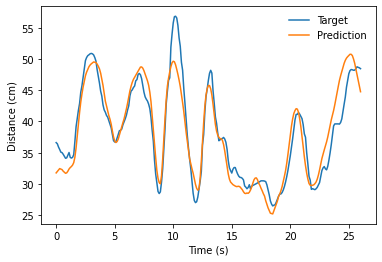

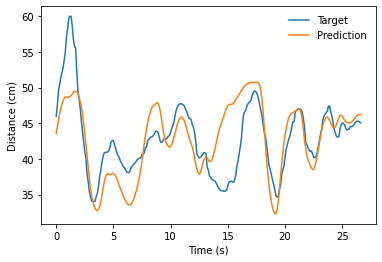

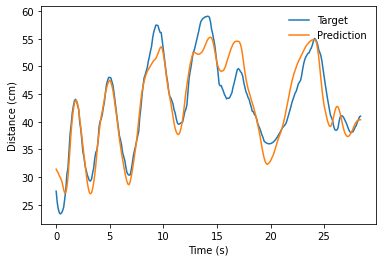

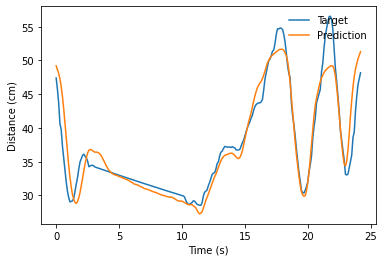

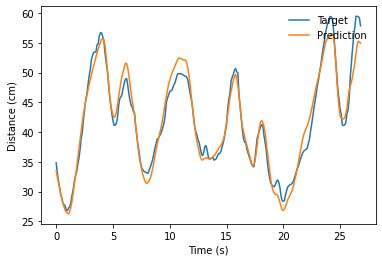

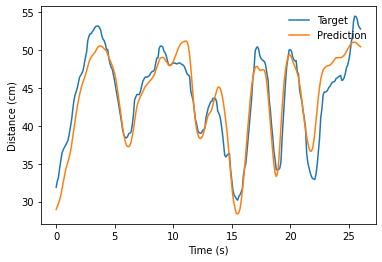

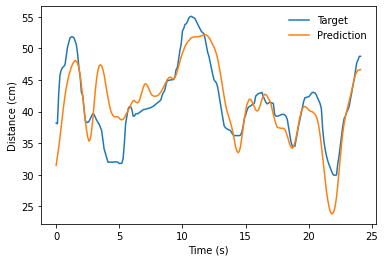

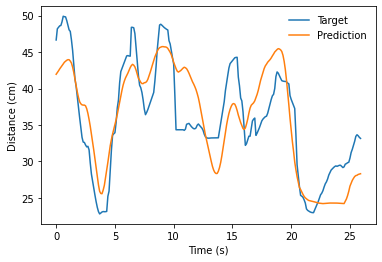

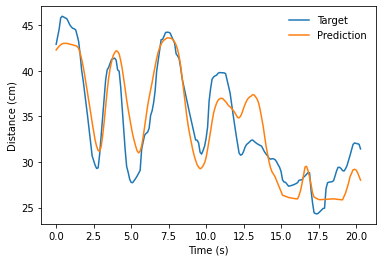

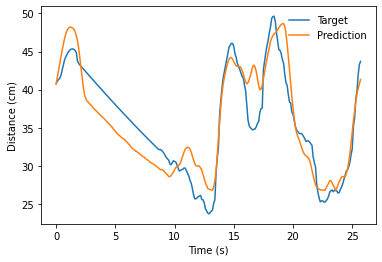

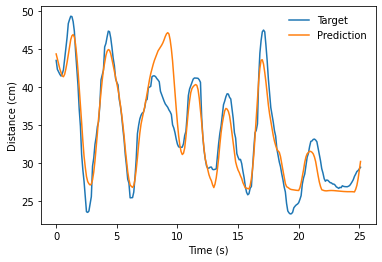

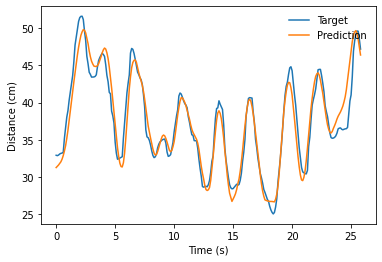

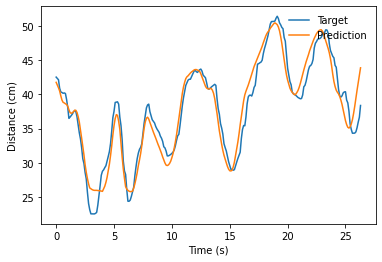

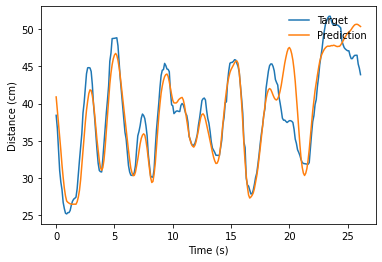

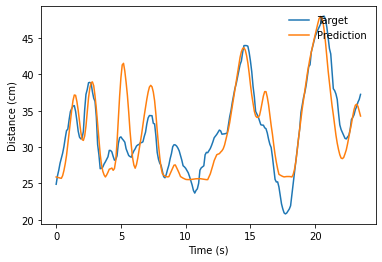

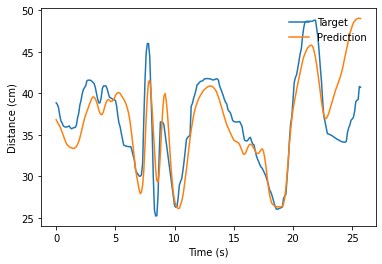

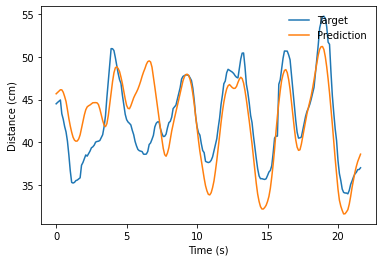

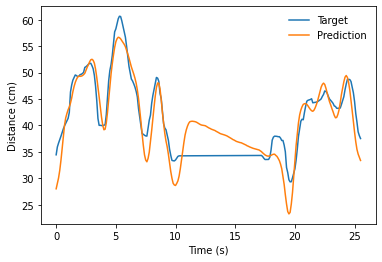

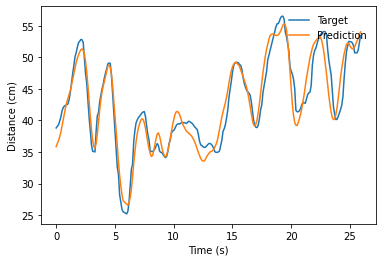

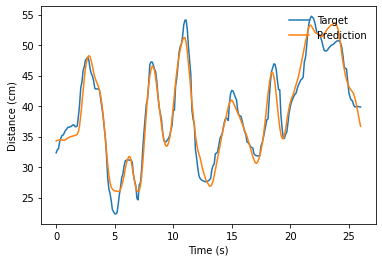

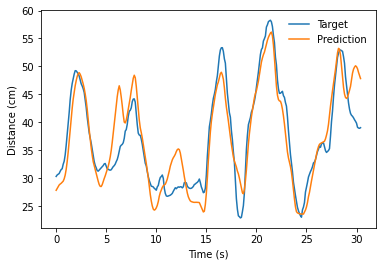

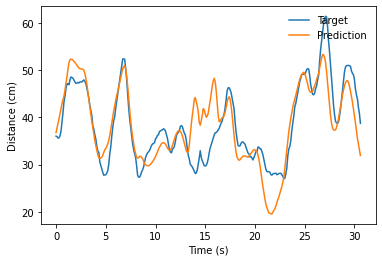

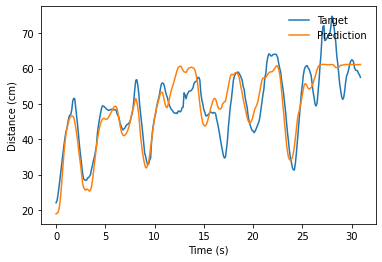

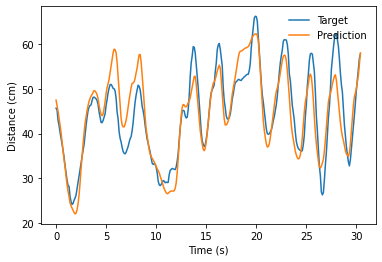

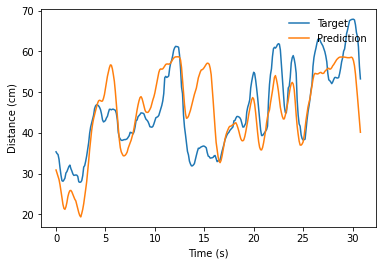

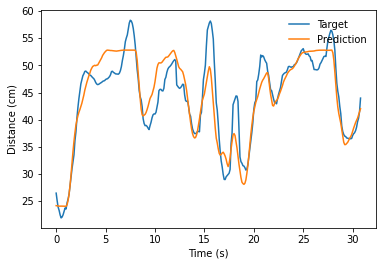

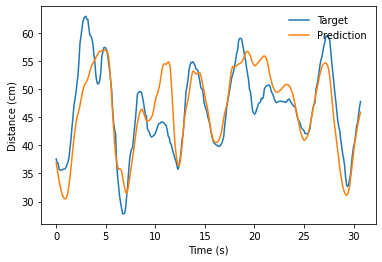

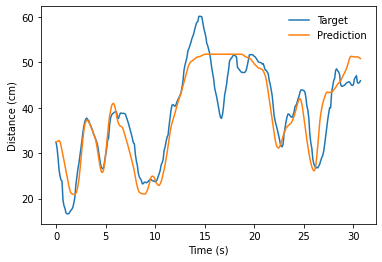

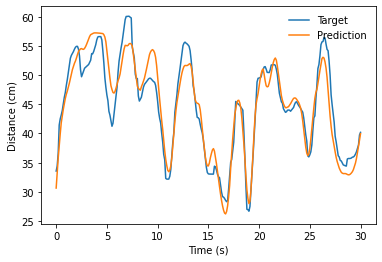

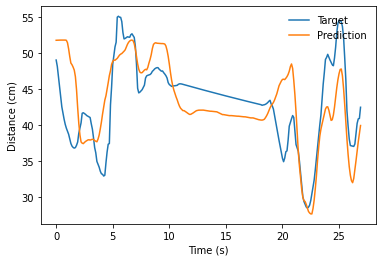

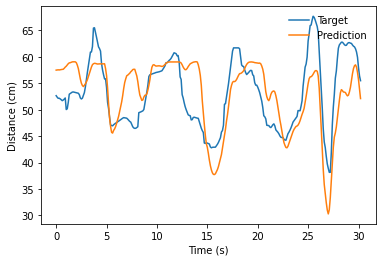

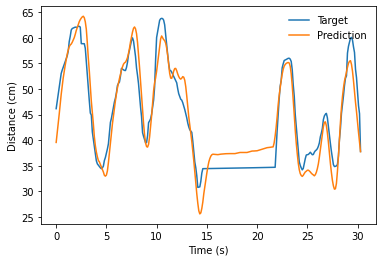

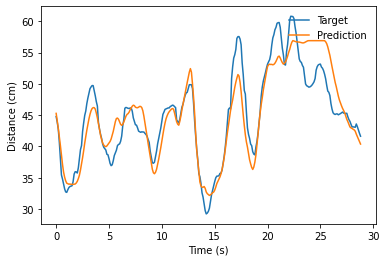

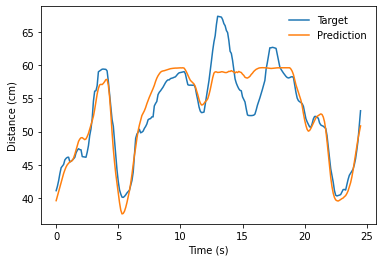

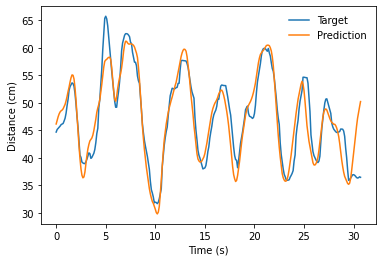

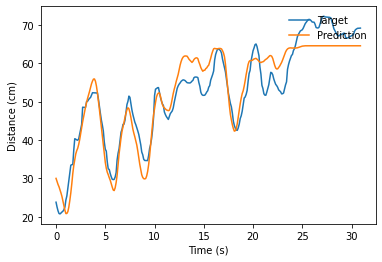

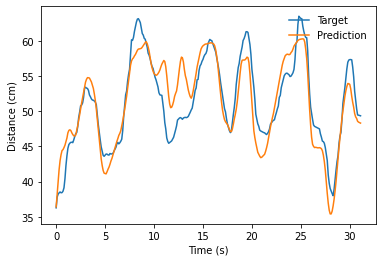

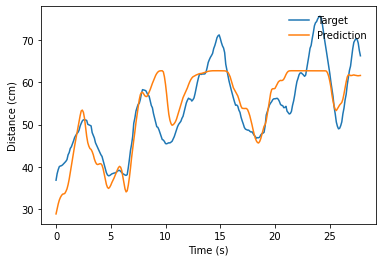

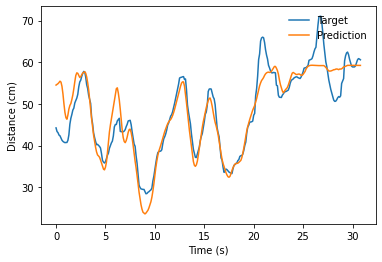

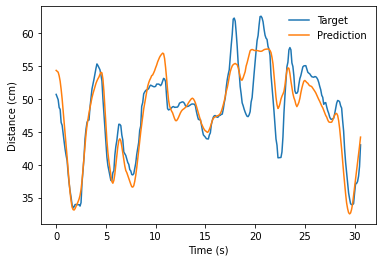

In [28]:
load_predict_model(
    setting = 'single', 
    target = 'r')

#### Single Node - Z

Transformation Pipeline and Model Successfully Loaded
RMSE = 0.04
R2 = 0.73
MAPE = 0.077


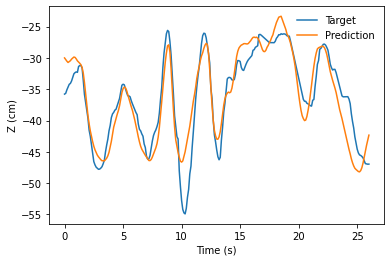

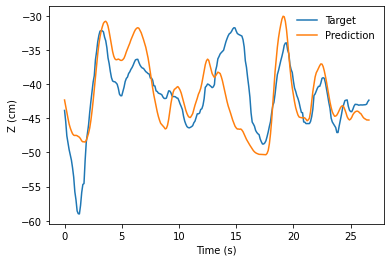

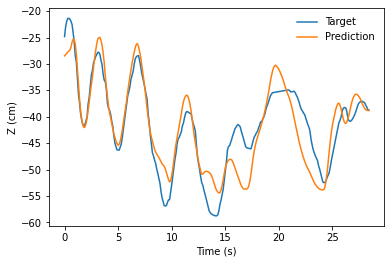

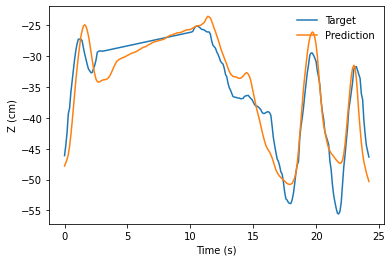

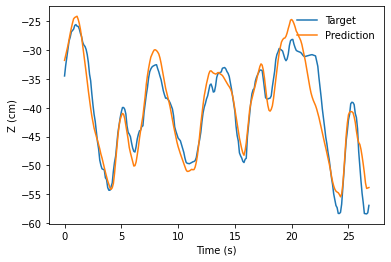

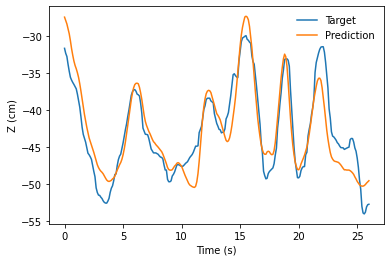

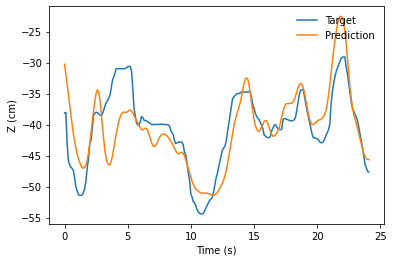

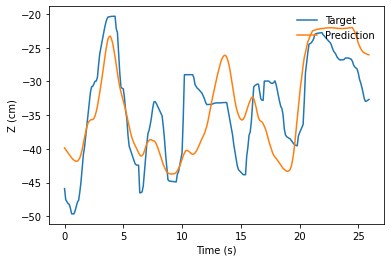

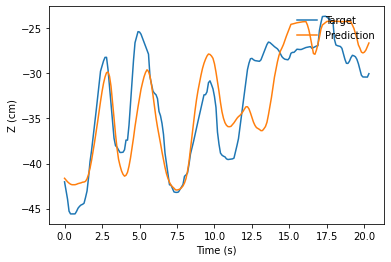

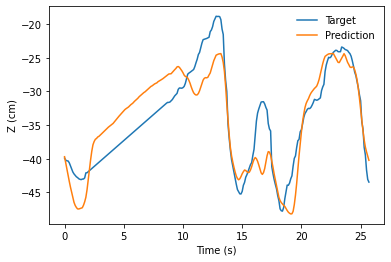

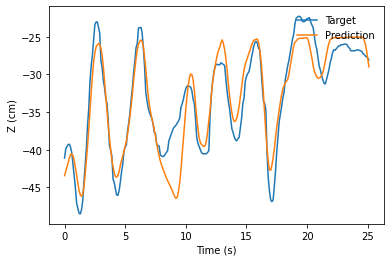

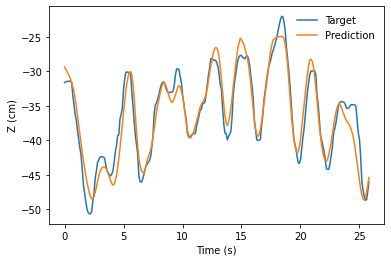

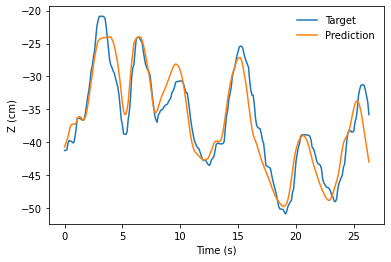

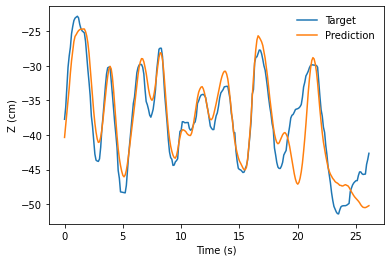

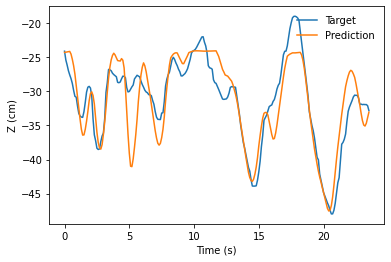

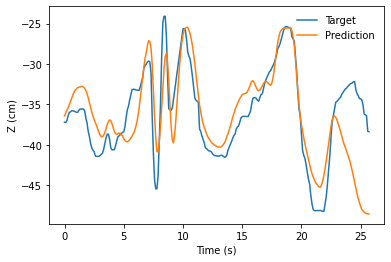

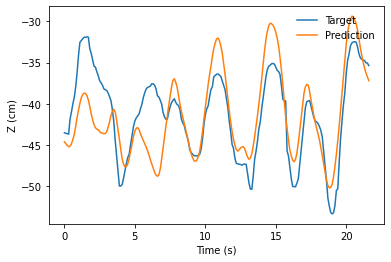

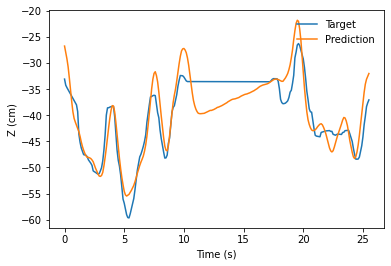

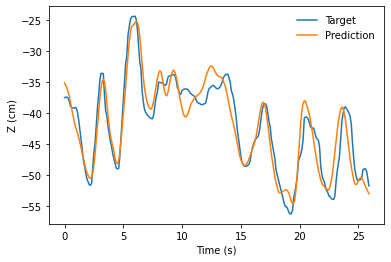

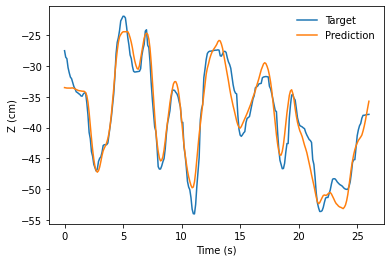

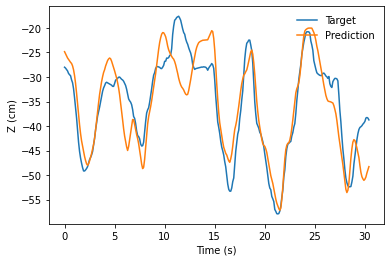

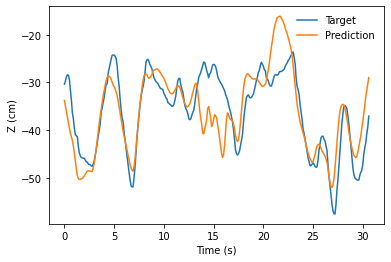

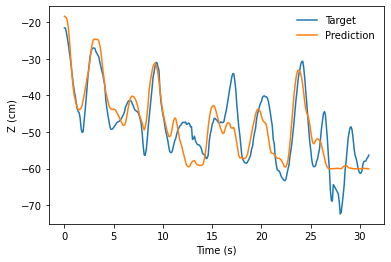

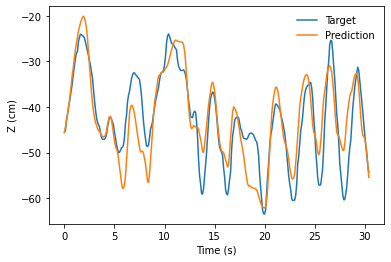

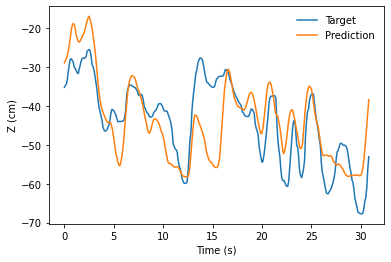

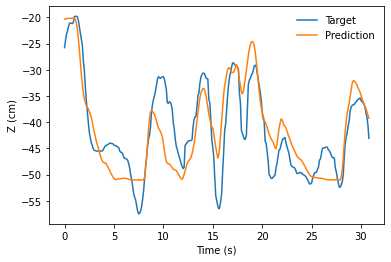

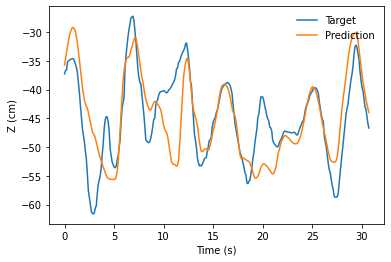

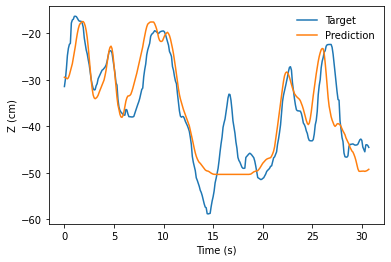

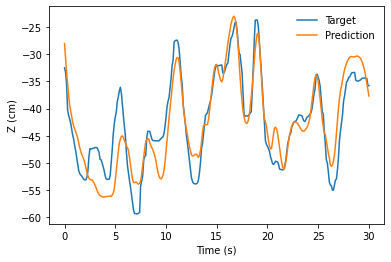

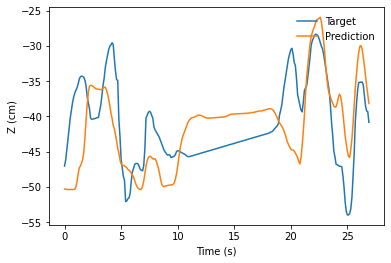

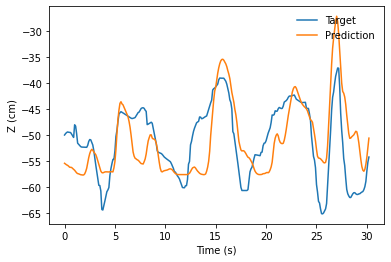

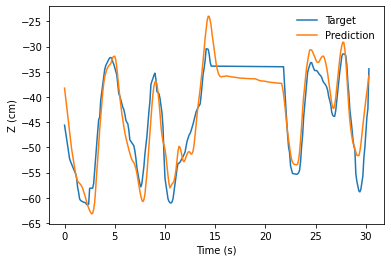

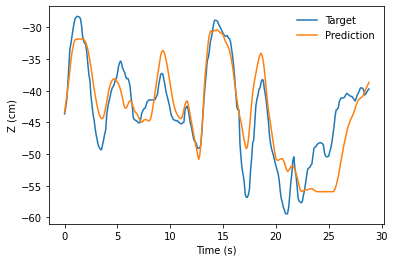

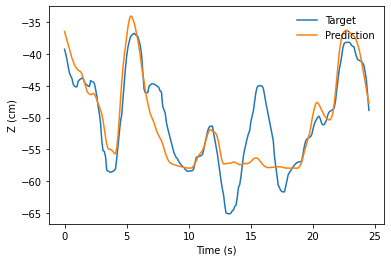

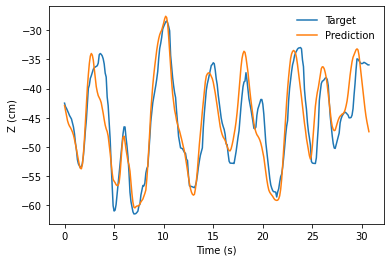

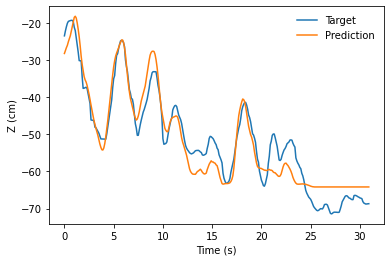

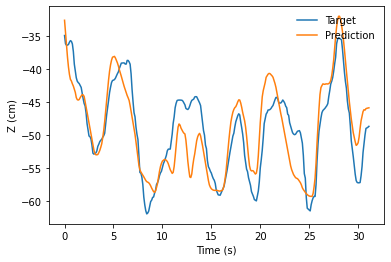

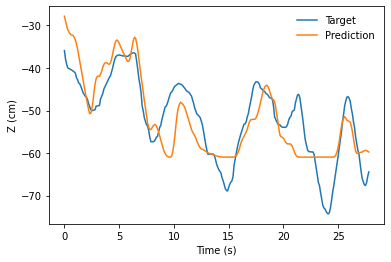

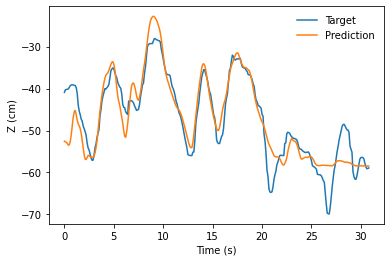

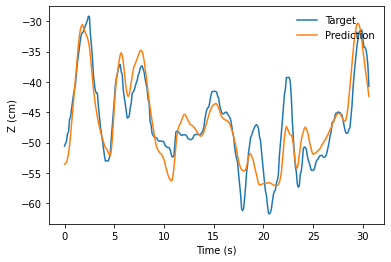

In [29]:
load_predict_model(
    setting = 'single', 
    target = 'z')

#### Parallel - Distance

Transformation Pipeline and Model Successfully Loaded
RMSE = 0.025
R2 = 0.84
MAPE = 0.052


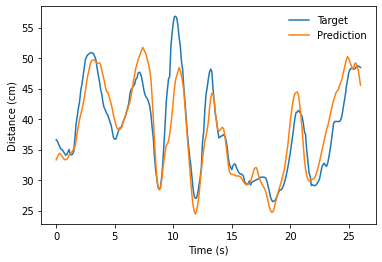

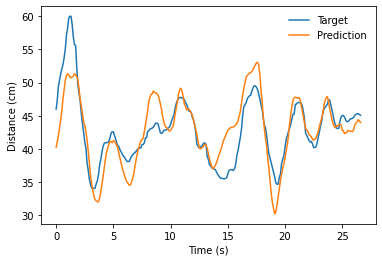

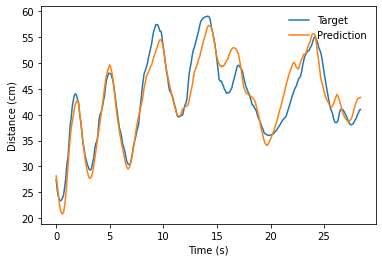

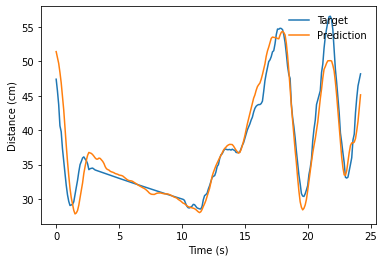

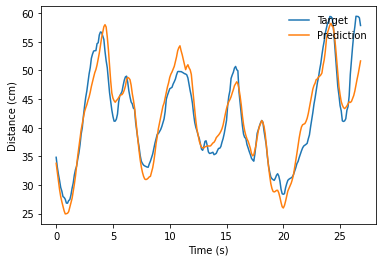

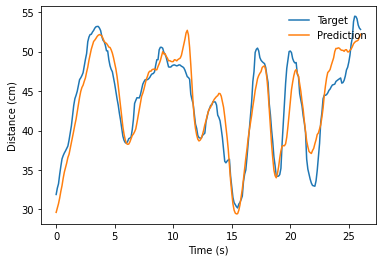

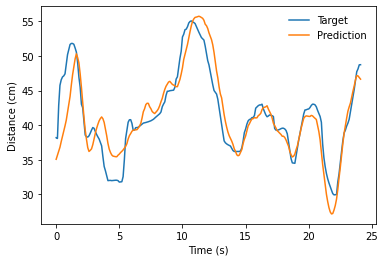

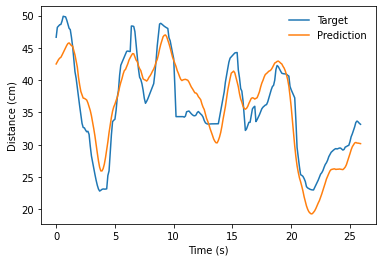

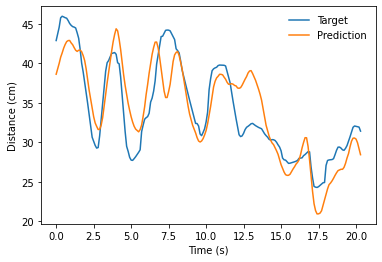

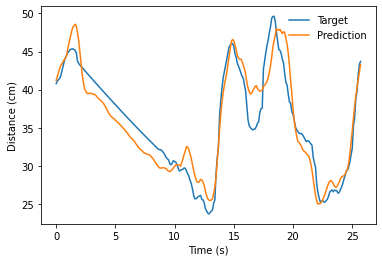

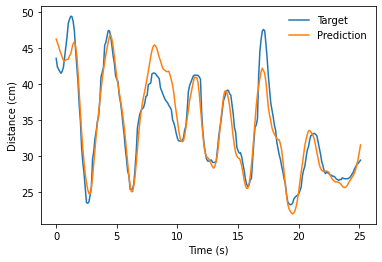

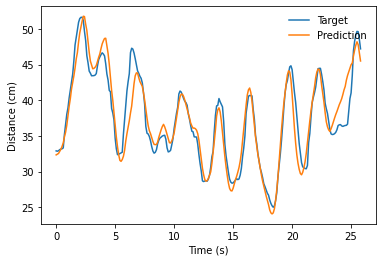

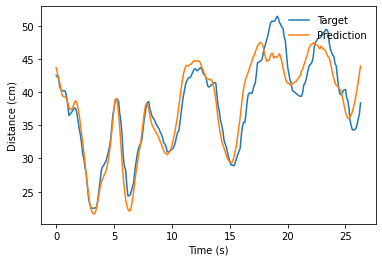

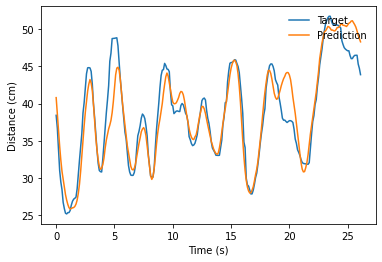

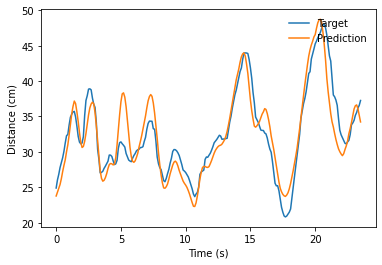

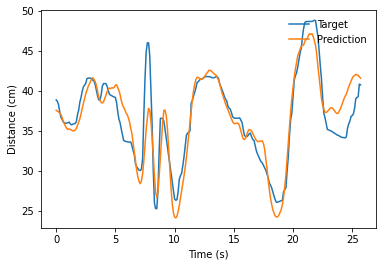

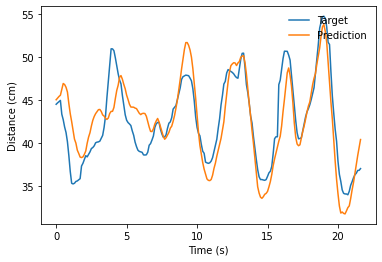

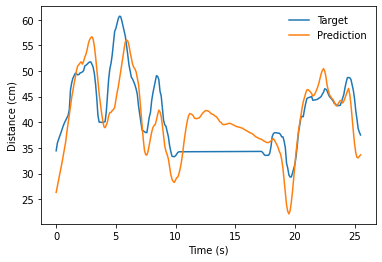

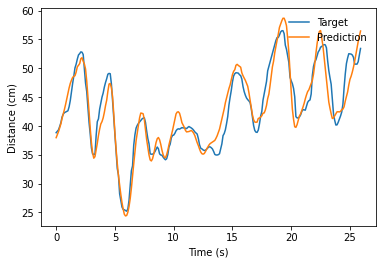

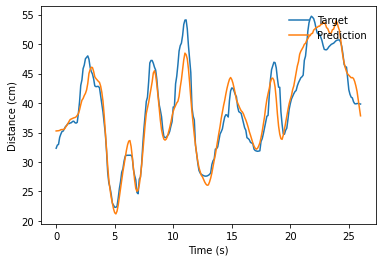

In [30]:
load_predict_model(
    setting = 'parallel', 
    target = 'r')

#### Parallel - z

Transformation Pipeline and Model Successfully Loaded
RMSE = 0.032
R2 = 0.801
MAPE = 0.067


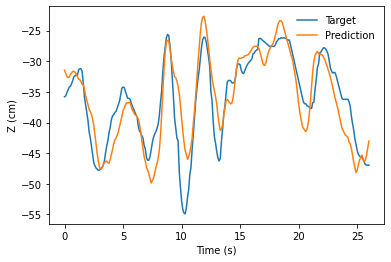

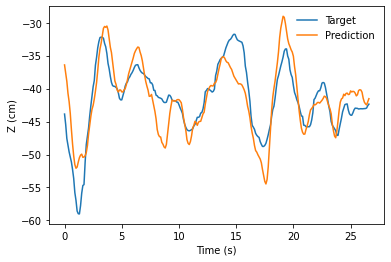

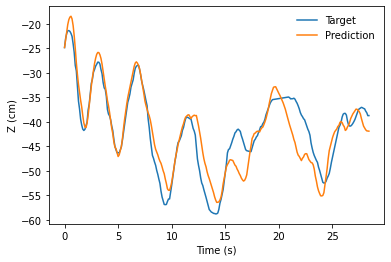

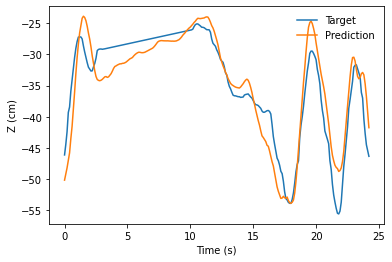

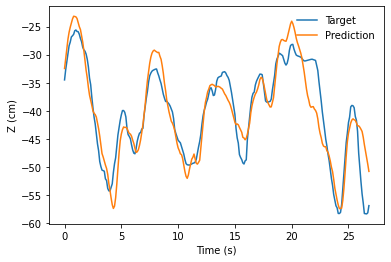

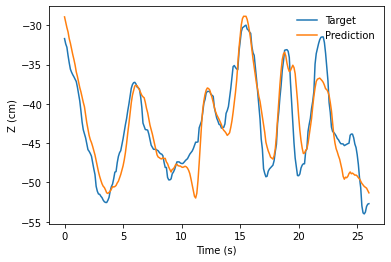

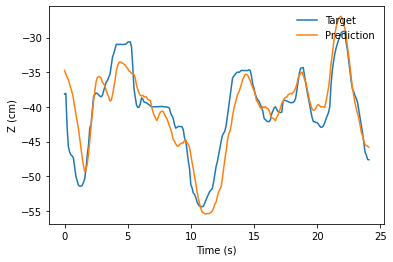

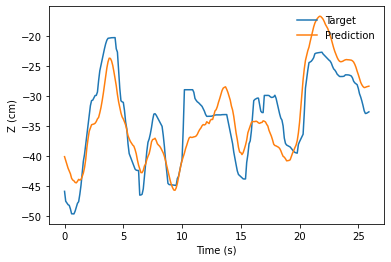

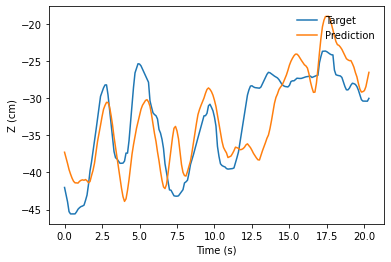

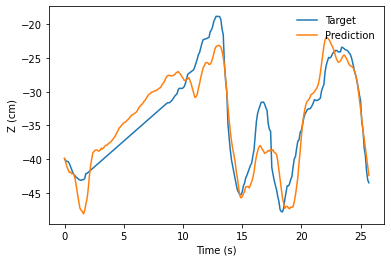

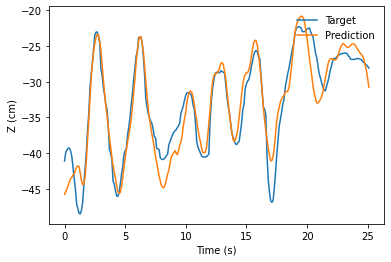

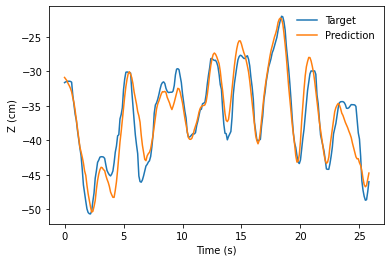

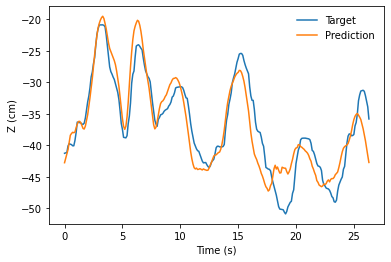

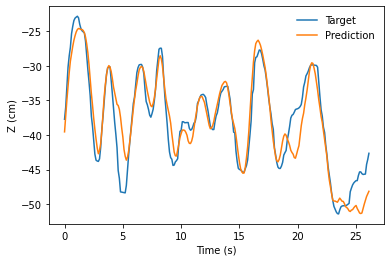

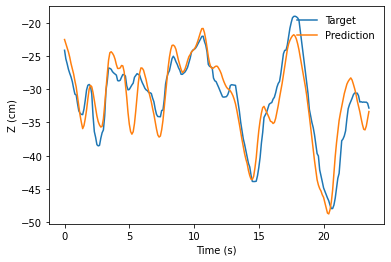

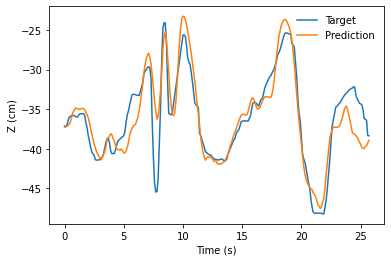

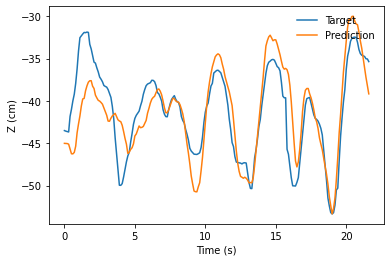

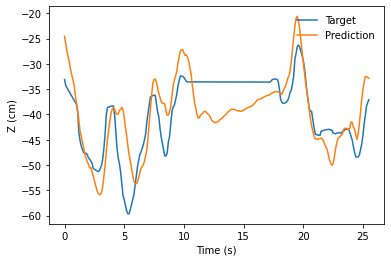

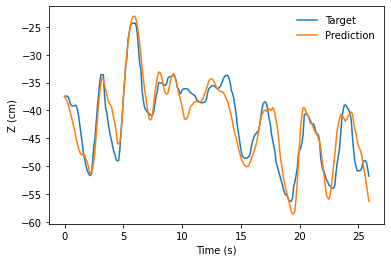

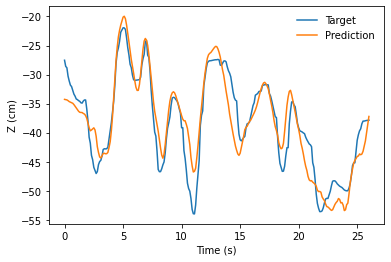

In [32]:
load_predict_model(
    setting = 'parallel', 
    target = 'z')

#### Orthogonal - Distance

Transformation Pipeline and Model Successfully Loaded
RMSE = 0.031
R2 = 0.847
MAPE = 0.054


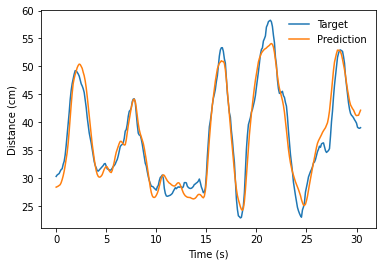

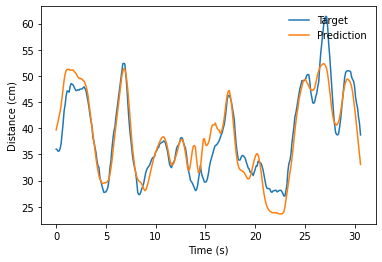

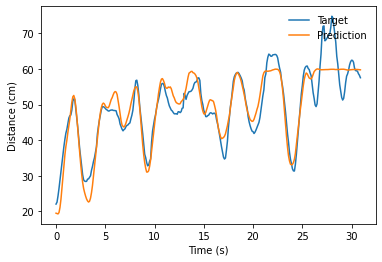

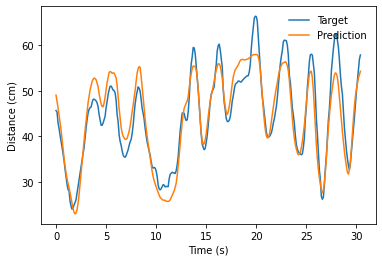

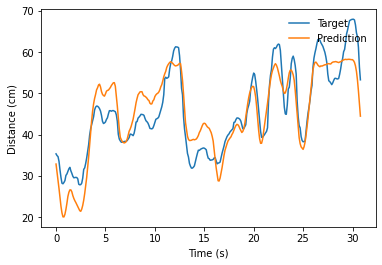

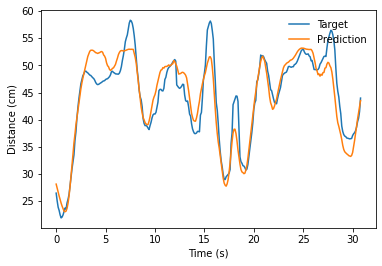

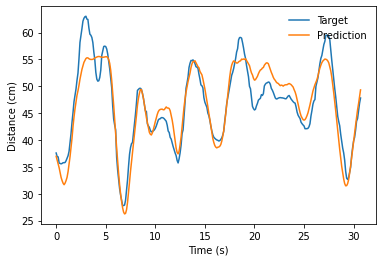

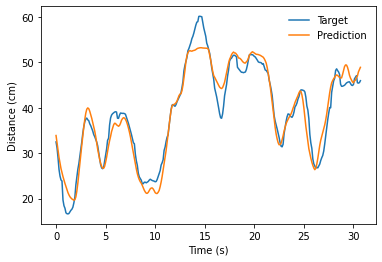

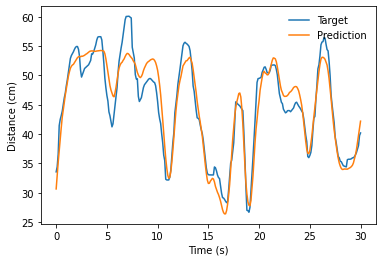

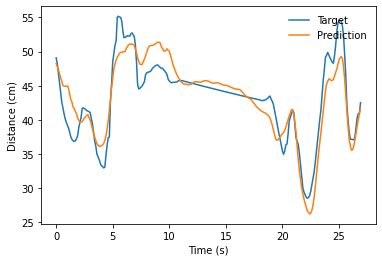

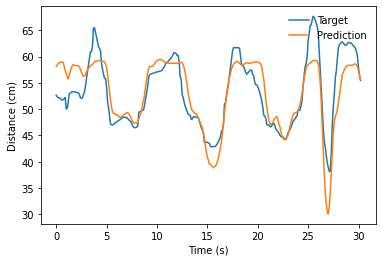

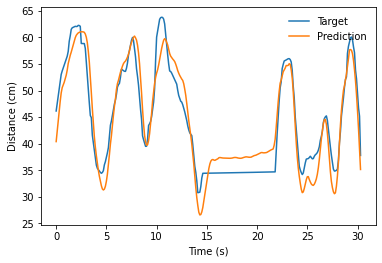

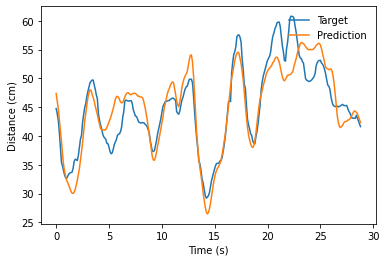

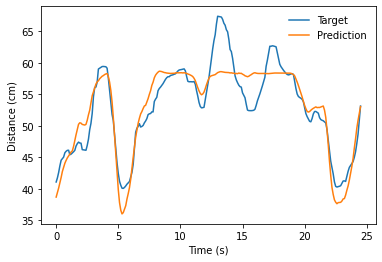

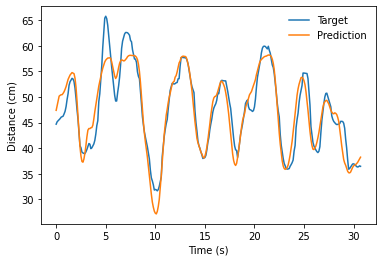

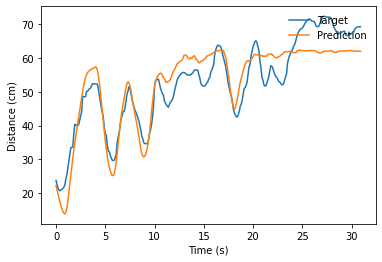

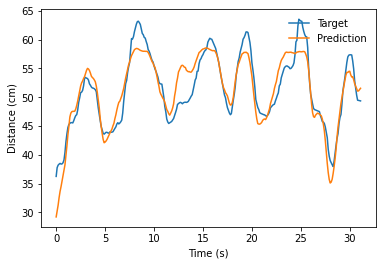

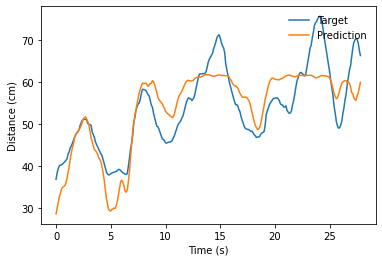

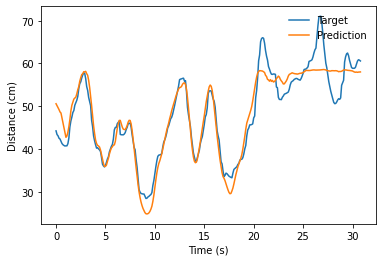

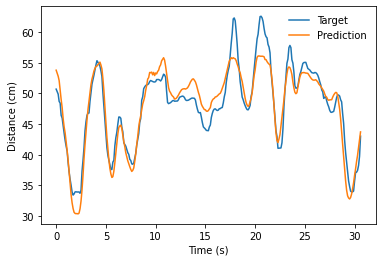

In [33]:
load_predict_model(
    setting = 'orthogonal', 
    target = 'r')

#### Orthogonal - Z

Transformation Pipeline and Model Successfully Loaded
RMSE = 0.039
R2 = 0.779
MAPE = 0.074


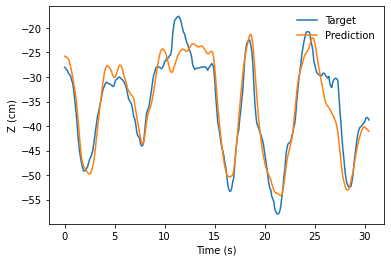

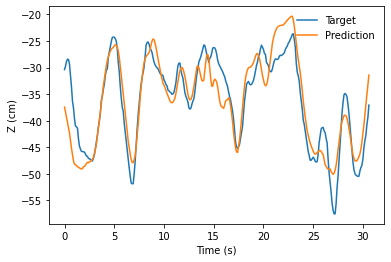

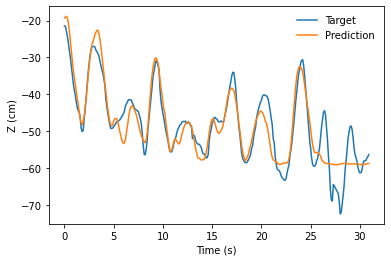

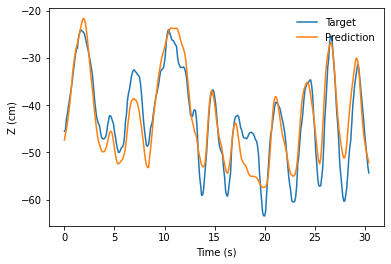

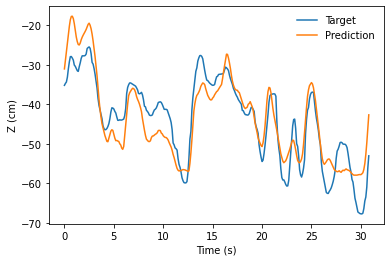

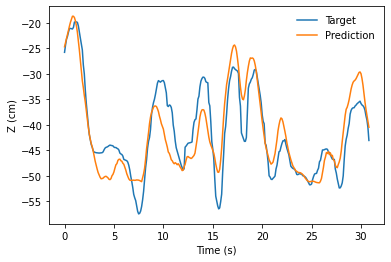

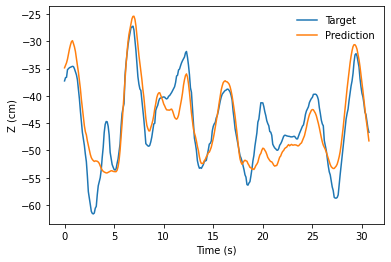

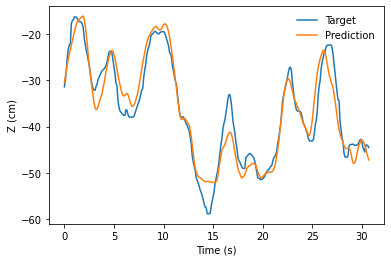

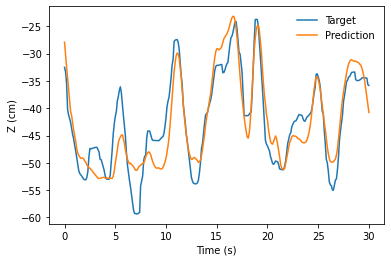

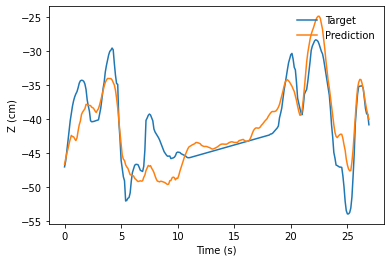

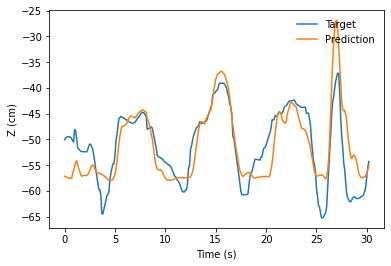

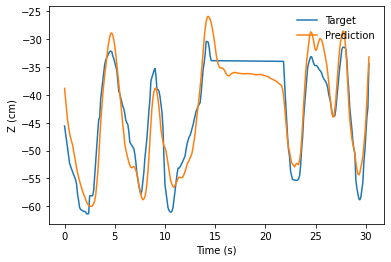

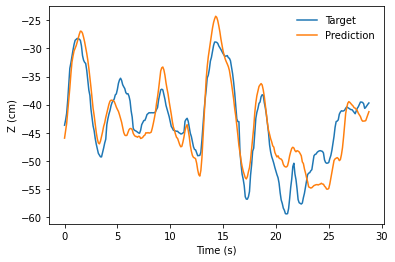

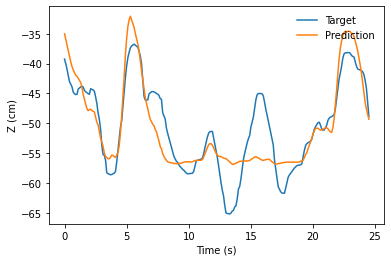

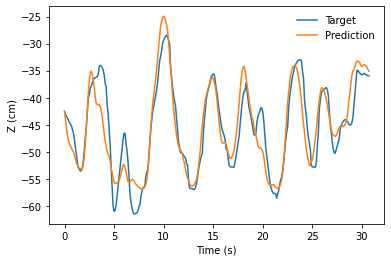

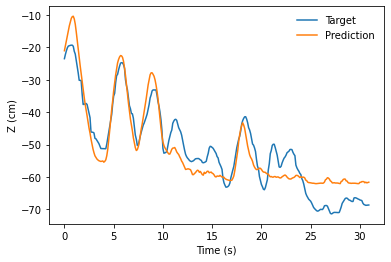

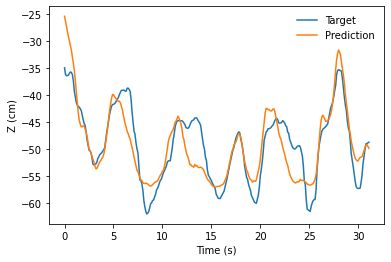

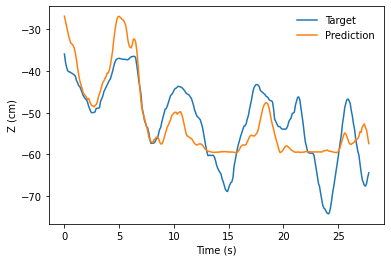

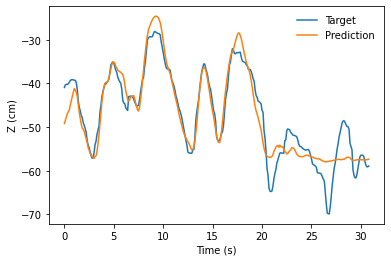

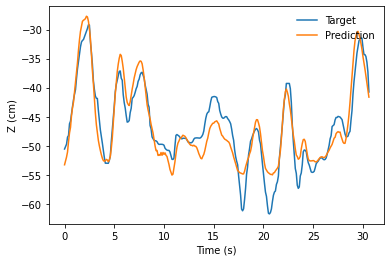

In [34]:
load_predict_model(
    setting = 'orthogonal', 
    target = 'z')